## 라이브러리 & 데이터 로드

In [1]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import datetime

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline

# 데이터 로드
from glob import glob

# tqdm
from tqdm import tqdm

# kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import kelbow_visualizer

In [2]:
# 파일 탐색
root_dir = "data/olist"
glob(f"{root_dir}/*.csv")

['data/olist\\complete_orders.csv',
 'data/olist\\olist_all.csv',
 'data/olist\\olist_customers_dataset.csv',
 'data/olist\\olist_geolocation_dataset.csv',
 'data/olist\\olist_orders_dataset.csv',
 'data/olist\\olist_order_items_dataset.csv',
 'data/olist\\olist_order_payments_dataset.csv',
 'data/olist\\olist_order_reviews_dataset.csv',
 'data/olist\\olist_products_dataset.csv',
 'data/olist\\olist_sellers_dataset.csv',
 'data/olist\\product_category_name_translation.csv']

In [3]:
# 칼럼 show 옵션 해제
pd.set_option('display.max_columns', None)

In [4]:
# 데이터 로드
df = pd.read_csv(f"{root_dir}/complete_orders.csv", 
                 parse_dates=["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
                              "order_delivered_customer_date", "shipping_limit_date"])
display(df.head())
df.shape

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
2  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
3  bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
4  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-08-15 18:29:31 2017-08-15 20:05:16   
2    delivered      2017-08-02 18:24:47 2017-08-02 18:43:15   
3    delivered      2017-10-23 23:26:46 2017-10-25 02:14:11   
4    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-08-17 15:28:33           2017-08-18 14:44:43   
2          2017-08-04 17:35:43           2017-08-07 18:30:01   
3          2017-10-27 16:48:46           2017-11-07 18:04:59   
4          2018-07-26 14:31:00           2018-08-07 15:27:45   

  order_estimated_delivery_date                customer_unique_id  \
0           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1           2017-08-28 00:00:00  3a51803cc0d012c3b5dc8b7528cb05f7   
2           2017-08-15 00:00:00  ef0996a1a279c26e7ecbd737be23d235   
3           2017-11-13 00:00:00  e781fdcc107d13d865fc7698711cc572   
4           2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   

   zip_code_prefix_customer  customer_city customer_state  \
0                      3149      sao paulo             SP   
1                      3366      sao paulo             SP   
2                      2290      sao paulo             SP   
3                     88032  florianopolis             SC   
4                     47813      barreiras             BA   

   geolocation_lat_customer  geolocation_lng_customer  \
0                -23.583452                -46.586284   
1                -23.564977                -46.536043   
2                -23.532175                -46.626106   
3                -27.553442                -48.500027   
4                -12.124719                -45.011148   

                          seller_id  zip_code_prefix_seller     seller_city  \
0  3504c0cb71d7fa48d967e0e4c94d59d9                    9350            maua   
1  3504c0cb71d7fa48d967e0e4c94d59d9                    9350            maua   
2  3504c0cb71d7fa48d967e0e4c94d59d9                    9350            maua   
3  3504c0cb71d7fa48d967e0e4c94d59d9                    9350            maua   
4  289cdb325fb7e7f891c38608bf9e0962                   31570  belo horizonte   

  seller_state  geolocation_lat_seller  geolocation_lng_seller  order_item_id  \
0           SP              -23.675542              -46.442547              1   
1           SP              -23.675542              -46.442547              1   
2           SP              -23.675542              -46.442547              1   
3           SP              -23.675542              -46.442547              1   
4           SP              -19.813375              -43.984022              1   

                         product_id shipping_limit_date   price  \
0  87285b34884572647811a353c7ac498a 2017-10-06 11:07:15   29.99   
1  87285b34884572647811a353c7ac498a 2017-08-21 20:05:16   29.99   
2  87285b34884572647811a353c7ac498a 2017-08-08 18:37:31   29.99   
3  87285b34884572647811a353c7ac498a 2017-10-31 02:14:11   29.99   
4  595fac2a385ac33a80bd5114aec74eb8 2018-07-30 03:24:27  118.70   

   freight_value  review_score payment_type  payment_installments  \
0           8.72             4      voucher                     1   
1           7.78             4  credit_card                     3   
2           7.78             5  credit_card                     1   
3          14.10             3       boleto               

(92657, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92657 entries, 0 to 92656
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       92657 non-null  object        
 1   customer_id                    92657 non-null  object        
 2   order_status                   92657 non-null  object        
 3   order_purchase_timestamp       92657 non-null  datetime64[ns]
 4   order_approved_at              92657 non-null  datetime64[ns]
 5   order_delivered_carrier_date   92657 non-null  datetime64[ns]
 6   order_delivered_customer_date  92657 non-null  datetime64[ns]
 7   order_estimated_delivery_date  92657 non-null  object        
 8   customer_unique_id             92657 non-null  object        
 9   zip_code_prefix_customer       92657 non-null  int64         
 10  customer_city                  92657 non-null  object        
 11  customer_state 

In [6]:
# 위경도 잘못된 것 정리
df = df[df["geolocation_lat_customer"] <= 5.27438888]
df = df[df["geolocation_lng_customer"] >= -73.98283055]
df = df[df["geolocation_lat_customer"] >= -33.75116944]
df = df[df["geolocation_lng_customer"] <=  -34.79314722]
df.shape

(92653, 29)

In [7]:
# 배송 시간 파생변수 생성
df["delivery_time"] = df["order_delivered_customer_date"] - df["order_purchase_timestamp"]

In [8]:
# 배송시간 100일 이상인 것 정리
print(df.shape)
df = df[df['delivery_time'] < datetime.timedelta(days=100)]
df.shape

(92653, 30)


(92591, 30)

<AxesSubplot: xlabel='geolocation_lng_seller', ylabel='geolocation_lat_seller'>

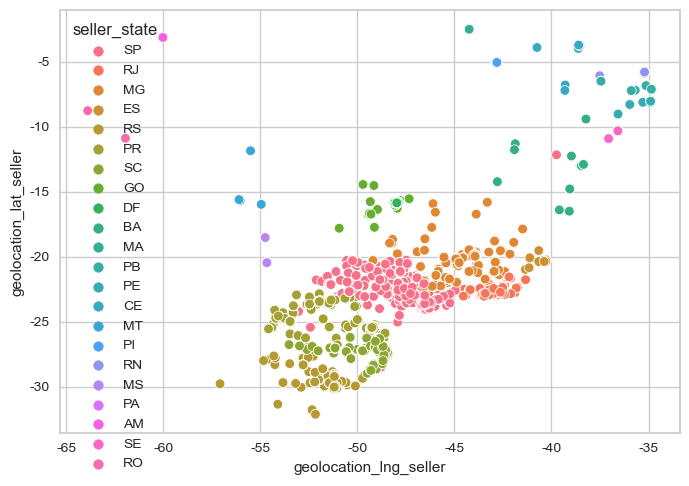

In [9]:
# 셀러 위경도 확인
sns.scatterplot(data=df, x="geolocation_lng_seller", y="geolocation_lat_seller", hue="seller_state")

<AxesSubplot: xlabel='geolocation_lng_customer', ylabel='geolocation_lat_customer'>

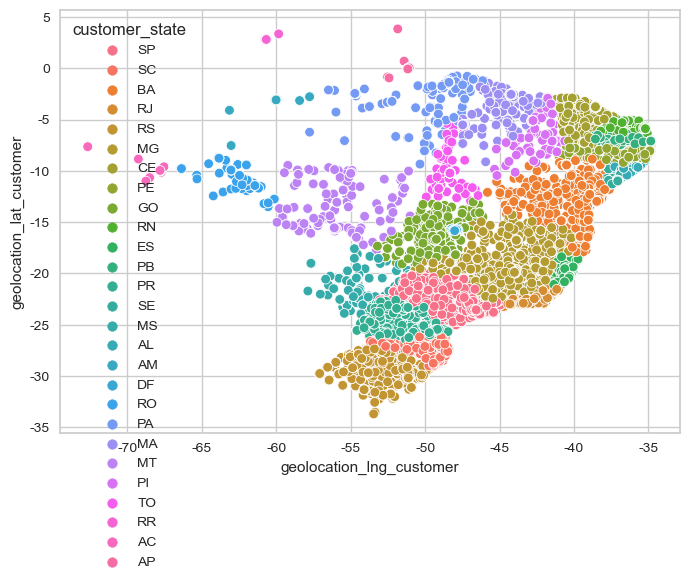

In [10]:
# 소비자 위경도 확인
sns.scatterplot(data=df, x="geolocation_lng_customer", y="geolocation_lat_customer", hue="customer_state")

## K-means

In [11]:
# 소비자 위경도만 추출
X = df[["geolocation_lat_customer", "geolocation_lng_customer"]].values
X

array([[-23.58345186, -46.58628352],
       [-23.56497656, -46.53604289],
       [-23.53217549, -46.62610624],
       ...,
       [-25.98629415, -49.68453697],
       [-23.17438739, -45.88017821],
       [-25.76621578, -49.7249824 ]])

In [12]:
# 최적의 k 구하기
range_n_clusters = range(2, 10)
for i in tqdm(range_n_clusters):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.23it/s]


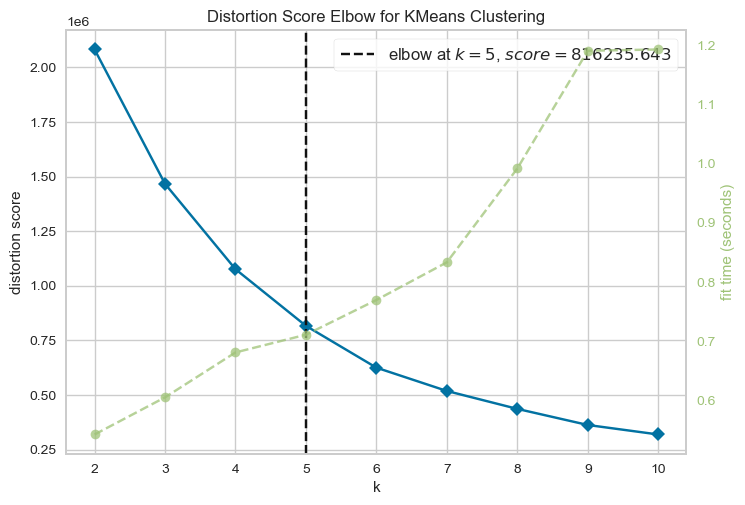

In [13]:
# elbow method 사용
kelbow_visualizer(kmeans, X, k=10);

- 파란선 : 그룹의 변동성 확인 지표
  - 군집내 변동성이 급감했다 -> 유사한 군집들끼리 잘 묶였다
  - 데이터 포인트와 해당 클러스터 중심 사이의 유클리드 거리의 합으로 계산

In [14]:
# 도출한 k값으로 클러스터링
n_cluster = 5

kmeans = KMeans(n_clusters=n_cluster, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [15]:
# 클러스터 번호 부여
X_cluster = kmeans.predict(X)
df['X_cluster'] = X_cluster
df['X_cluster'] = df['X_cluster'].map(lambda x: 'c_' + str(x).rjust(2, '0'))

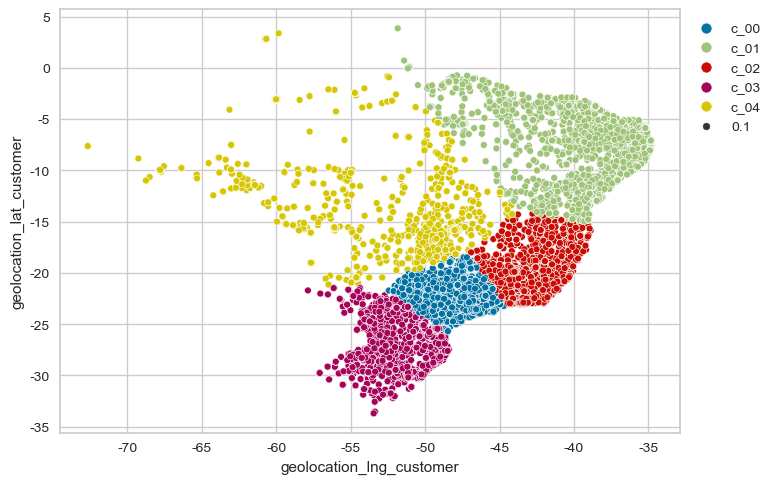

In [16]:
sns.scatterplot(data=df, x="geolocation_lng_customer", y="geolocation_lat_customer", 
                hue="X_cluster", size=0.1, hue_order=np.sort(df['X_cluster'].unique()))
plt.legend(bbox_to_anchor=(1,1))

## 주문 비율

In [17]:
# 클러스터별 주문 비율 확인
df["X_cluster"].value_counts(1)

c_00    0.448154
c_02    0.245229
c_03    0.141688
c_01    0.096597
c_04    0.068333
Name: X_cluster, dtype: float64

<AxesSubplot: xlabel='X_cluster', ylabel='count'>

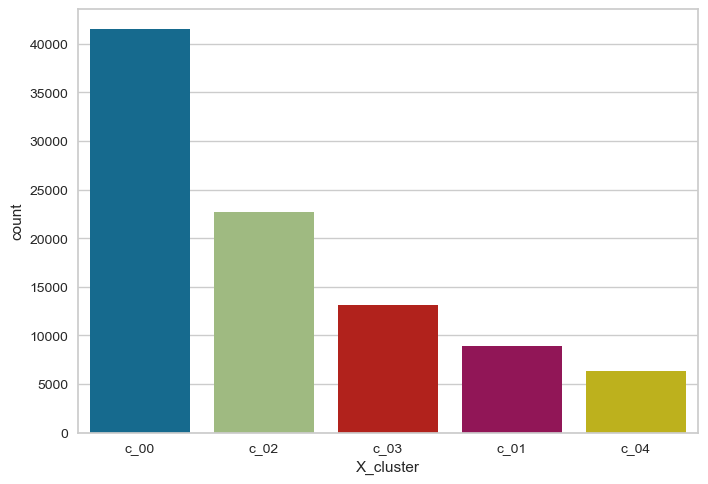

In [18]:
# 클러스터별 주문 비율 시각화
sns.countplot(data=df, x="X_cluster", order=df["X_cluster"].value_counts().index)

In [19]:
# 0번 클러스터 내 도시별 주문비율 확인
df.loc[df["X_cluster"] == "c_00", "customer_city"].value_counts(1)

sao paulo                0.348307
campinas                 0.032799
guarulhos                0.026365
sao bernardo do campo    0.021111
santo andre              0.018074
                           ...   
sao jose da boa vista    0.000024
pereiras                 0.000024
pardinho                 0.000024
nova independencia       0.000024
silveira carvalho        0.000024
Name: customer_city, Length: 828, dtype: float64

In [20]:
# 상위 10개만 뽑음
city_count = df.loc[df["X_cluster"] == "c_00", "customer_city"].value_counts().nlargest(10)
city_count

sao paulo                14453
campinas                  1361
guarulhos                 1094
sao bernardo do campo      876
santo andre                750
osasco                     707
santos                     676
sao jose dos campos        646
sorocaba                   592
jundiai                    523
Name: customer_city, dtype: int64

<AxesSubplot: >

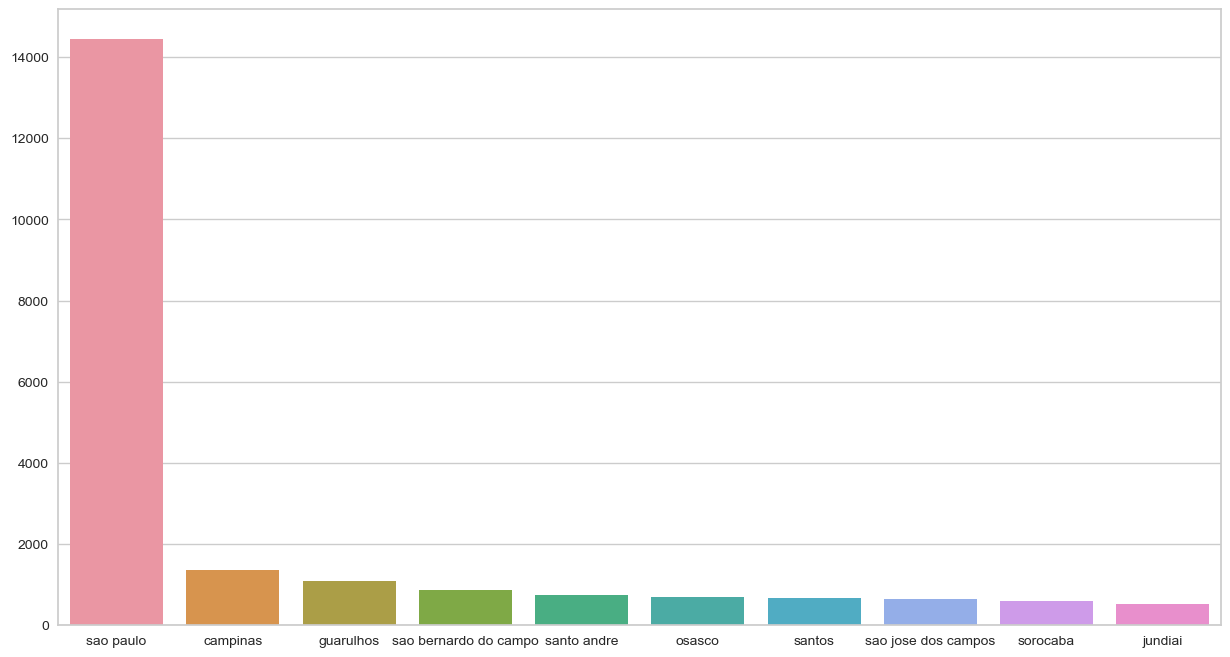

In [21]:
# 0번 클러스터 내 도시별 주문비율 상위 10개 시각화
plt.figure(figsize=(15,8))
sns.barplot(x=city_count.index, y=city_count.values)